<a href="https://colab.research.google.com/github/enigmatized/LookingForAlphaWithPythonNotebooks/blob/main/EUROusdPairBackTestingAsianMarketTrend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# This I learnt from this
1.   Instead of trying to optimize of tops, it might be best to try to time trends, then stay in that trend no matter what(with exception to 3 SD moves?-- need to find a optmiziation to this)
2.   I think because I am working.
And I sell my gains too early.
I really would benefit from an autmoated trading system
I want to automate this strategy for onanda
Seems like I have something that is postive EV
I think the next move is start finding optimal Stop losses and start trading that in mind
 Need to get a super large data set to.
So I not just optmizing on this data set.
Step two would try to find stastitical significance on this






In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from collections import defaultdict

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
from datetime import datetime, timedelta, time

import moduleName


In [42]:
CSVfiles = []
for file in os.listdir("./"): 
  if file.endswith(".csv"): 
    CSVfiles.append(file)
print(CSVfiles)


#Global helper functions that I will probably always want
#unixTimeConverter = lambda x : (datetime.fromtimestamp(x)- timedelta(hours=0.5)).strftime('%Y-%m-%d %H:%M:%S')

unixTimeConverter = lambda x : (datetime.fromtimestamp(x)).strftime('%Y-%m-%d %H:%M:%S')


unixTimeConverterNoDateJustTime = lambda x : (datetime.fromtimestamp(x)).time()



allDfs = []

for x in CSVfiles:
  dfTemp = pd.read_csv(x)
  dfTemp['estTime']  = dfTemp['time'].apply(unixTimeConverter)
  dfTemp['timeOnly'] = dfTemp['time'].apply(unixTimeConverterNoDateJustTime)
  dfTemp['heikin_ashi_open']  = 0.5 *( df['close'].shift(1) +df['open'].shift(1) )
  dfTemp['heikin_ashi_close'] = df.apply(lambda row: 0.25 * (row.open + row['close'] + row['high'] + row['low'])  , axis = 1)
  
  dfTemp = dfTemp.tail(-1)
  dfTemp = dfTemp.head(-1)
  
  
  
  allDfs.append(dfTemp)






allDfs[0].head(10)

#df= allDfs[0]

['OANDA EURUSD, 15(1).csv', 'OANDA EURUSD, 60.csv', 'OANDA EURUSD, 30(3).csv', 'OANDA EURUSD, 120.csv', 'OANDA EURUSD, 240.csv']


,time,open,high,low,close,Volume,Volume MA,estTime,timeOnly,heikin_ashi_open,heikin_ashi_close
1,1658173500,1.01416,1.01446,1.01410,1.01435,971,1223.85,2022-07-18 19:45:00,19:45:00,1.014680,1.014267
2,1658174400,1.01435,1.01463,1.01428,1.01450,582,1134.40,2022-07-18 20:00:00,20:00:00,1.014255,1.014440
3,1658175300,1.01450,1.01456,1.01421,1.01425,376,1066.25,2022-07-18 20:15:00,20:15:00,1.014425,1.014380
4,1658176200,1.01425,1.01456,1.01425,1.01450,184,1005.60,2022-07-18 20:30:00,20:30:00,1.014375,1.014390
5,1658177100,1.01450,1.01464,1.01416,1.01444,218,957.25,2022-07-18 20:45:00,20:45:00,1.014375,1.014435
6,1658178000,1.01444,1.01458,1.01430,1.01444,66,911.35,2022-07-18 21:00:00,21:00:00,1.014470,1.014440
7,1658178900,1.01444,1.01462,1.01442,1.01460,112,856.85,2022-07-18 21:15:00,21:15:00,1.014440,1.014520
8,1658179800,1.01460,1.01470,1.01450,1.01460,435,834.05,2022-07-18 21:30:00,21:30:00,1.014520,1.014600
9,1658180700,1.01460,1.01476,1.01455,1.01468,399,797.80,2022-07-18 21:45:00,21:45:00,1.014600,1.014647
10,1658181600,1.01468,1.01492,1.01452,1.01472,321,771.50,2022-07-18 22:00:00,22:00:00,1.014640,1.014710


0        1.014673
1        1.014267
2        1.014440
3        1.014380
4        1.014390
           ...   
19003    1.098728
19004    1.099103
19005    1.099040
19006    1.098802
19007    1.098875
Length: 19008, dtype: float64

In [ ]:
#This is hard codeed, need to re-do this to make it better and more automated
ls = allDfs[0]['timeOnly'].values.tolist()
noDuplicateLs =  list(dict.fromkeys(ls))
#str15MinTrimeFrames = [( x, str(x)) for x in noDuplicateLs] #NOTE I might need to re-create that for after every start of the bot
#str15MinTrimeFrames = [x for x in noDuplicateLs] #NOTE I might need to re-create that for after every start of the bot
str15MinTrimeFrames = [str(x) for x in noDuplicateLs] #NOTE I might need to re-create that for after every start of the bot

ls = allDfs[2]['timeOnly'].values.tolist()
noDuplicateLs =  list(dict.fromkeys(ls))
str30MinTrimeFrames = [str(x) for x in noDuplicateLs] #NOTE I might need to re-create that for after every start of the bot


ls = allDfs[1]['timeOnly'].values.tolist()
noDuplicateLs =  list(dict.fromkeys(ls))
str60MinTrimeFrames = [str(x) for x in noDuplicateLs] #NOTE I might need to re-create that for after every start of the bot


ls = allDfs[3]['timeOnly'].values.tolist()
noDuplicateLs =  list(dict.fromkeys(ls))
str120MinTrimeFrames = [str(x) for x in noDuplicateLs] #NOTE I might need to re-create that for after every start of the bot

ls = allDfs[4]['timeOnly'].values.tolist()
noDuplicateLs =  list(dict.fromkeys(ls))
str240MinTrimeFrames = [str(x) for x in noDuplicateLs] #NOTE I might need to re-create that for after every start of the bot



print(str15MinTrimeFrames)
print(str30MinTrimeFrames)


print(list(dict.fromkeys(ls))[0])
print(time(23))
list(dict.fromkeys(ls))[0]

['19:30:00', '19:45:00', '20:00:00', '20:15:00', '20:30:00', '20:45:00', '21:00:00', '21:15:00', '21:30:00', '21:45:00', '22:00:00', '22:15:00', '22:30:00', '22:45:00', '23:00:00', '23:15:00', '23:30:00', '23:45:00', '00:00:00', '00:15:00', '00:30:00', '00:45:00', '01:00:00', '01:15:00', '01:30:00', '01:45:00', '02:00:00', '02:15:00', '02:30:00', '02:45:00', '03:00:00', '03:15:00', '03:30:00', '03:45:00', '04:00:00', '04:15:00', '04:30:00', '04:45:00', '05:00:00', '05:15:00', '05:30:00', '05:45:00', '06:00:00', '06:15:00', '06:30:00', '06:45:00', '07:00:00', '07:15:00', '07:30:00', '07:45:00', '08:00:00', '08:15:00', '08:30:00', '08:45:00', '09:00:00', '09:15:00', '09:30:00', '09:45:00', '10:00:00', '10:15:00', '10:30:00', '10:45:00', '11:00:00', '11:15:00', '11:30:00', '11:45:00', '12:00:00', '12:15:00', '12:30:00', '12:45:00', '13:00:00', '13:15:00', '13:30:00', '13:45:00', '14:00:00', '14:15:00', '14:30:00', '14:45:00', '15:00:00', '15:15:00', '15:30:00', '15:45:00', '16:00:00', '16

datetime.time(21, 0)

In [ ]:


# [x for x in df.apply(type).unique()]
df.dtypes
df.head()

,time,open,high,low,close,Volume,Volume MA,estTime,timeOnly
0,1642458600,1.14101,1.14101,1.14080,1.14086,33,835.65,2022-01-17 22:30:00,22:30:00
1,1642460400,1.14086,1.14086,1.14056,1.14056,174,746.50,2022-01-17 23:00:00,23:00:00
2,1642462200,1.14056,1.14100,1.14055,1.14098,165,655.75,2022-01-17 23:30:00,23:30:00
3,1642464000,1.14098,1.14152,1.14078,1.14122,407,569.70,2022-01-18 00:00:00,00:00:00
4,1642465800,1.14122,1.14190,1.14118,1.14187,447,491.90,2022-01-18 00:30:00,00:30:00


In [ ]:
df.tail(20)

,time,open,high,low,close,Volume,Volume MA,estTime,timeOnly
15631,1681912800,1.09602,1.097940,1.096020,1.096700,3617,2515.35,2023-04-19 14:00:00,14:00:00
15632,1681914600,1.09670,1.097610,1.095700,1.095720,3219,2641.70,2023-04-19 14:30:00,14:30:00
15633,1681916400,1.09572,1.096230,1.095330,1.096110,2678,2740.95,2023-04-19 15:00:00,15:00:00
15634,1681918200,1.09611,1.096160,1.095120,1.095300,1974,2779.60,2023-04-19 15:30:00,15:30:00
15635,1681920000,1.09530,1.095760,1.095195,1.095540,1469,2673.55,2023-04-19 16:00:00,16:00:00
15636,1681921800,1.09554,1.096680,1.095540,1.096580,1481,2580.15,2023-04-19 16:30:00,16:30:00
15637,1681923600,1.09658,1.096680,1.095500,1.095680,1754,2504.70,2023-04-19 17:00:00,17:00:00
15638,1681925400,1.09568,1.095980,1.095420,1.095620,1068,2433.85,2023-04-19 17:30:00,17:30:00
15639,1681927200,1.09562,1.096060,1.095400,1.095880,1392,2366.60,2023-04-19 18:00:00,18:00:00
15640,1681929000,1.09588,1.095900,1.095180,1.095280,1233,2310.90,2023-04-19 18:30:00,18:30:00


### The below is was my first stab at gauging pre-market trend
#### With follow through on the day

# Which I was really amazed to see, this would have been a profitable trading strategy, so I spent more time exploring and trying to optimize this




In [ ]:
#iterate through the entire df
#check time
#


#Start, #stop
#before 
total = 0
buy = 0
sell = 0

averageDIff= []

action = None
#If at 8am check what the trend was from 21,
# Buy and sell in respect to that
# calculate profits off that

state = ("pass", 0) #(action, holdingOrWaiting, price) 
for index, row in df.iterrows():
  if "8:00:00" in row['estTime'] and "18:00:00" not in row['estTime']:
    twenityOneHour = index - 10
    if twenityOneHour > 0: 
      # print(row["open"], df["open"][twenityOneHour])

      averageDIff.append(row["open"] - df["open"][twenityOneHour])
      priceDelta = row["open"] - df["open"][twenityOneHour]
      action = ""
      action =  "buy" if priceDelta > 0 else "sell"
      action =  "pass" if priceDelta == 0 else action
      state  =  (action, row["open"])
  
  if "14:30:00" in row['estTime'] and action != None and action[0] != "pass":
    if state[0] == "buy" : 
      total += row["open"] - state[1]  
      buy   += row["open"] - state[1]  

    if state[0] == "sell" : 
      total += state[1] -  row["open"] 
      sell   += state[1] -  row["open"]
   
  





print(total, buy, sell)




0.03642000000000034 0.01959999999999984 0.0168200000000005


### Below is me working on seeing if there are different time of day that would be better for this.

##What I found was 



1.   It seems like the market trends down, in respect to the pre-market trend. Meaning if the pre-market trend is upward, after open(8am) the market trends down, the pops back up. 
2.   It almost seems like buying


In [ ]:
#Start, #stop
#before 


#hmmm I want more optimal times
#Where do I go after this?
#SO this might get a little wild
#1. So I want to know when the most optimal time to sell is
#     A. I wonder if by time is actually a good way about going about this
#     B. Should I be going after direction size
#             a. And relative move for that day. Like is it in a ATR range? 
#             b. Or are we a SD move, 2 SD move
#     D.
#2. and the most optimal time to get out of a trade when it is against me
#3. Also I want the optimal time to guage the pre-market trend
#4. A mix of other indicators would be great to





averageDIff= []

action = None


timesTradesTotal =  defaultdict(list)
timesTradesBuy   =  defaultdict(list)
timesTradesSell  =  defaultdict(list)

# So I am either adding to a time object
# Or a string
# or Converting a string to a number with value


def isNowInTimePeriod(startTime, endTime, nowTime):
    if startTime < endTime:
        return nowTime >= startTime and nowTime <= endTime
    else: #Over midnight
        return nowTime >= startTime or nowTime <= endTime







state = ("pass", 0) #(action, holdingOrWaiting, price) 
for index, row in df.iterrows():
  if index < 24: pass
  else: 
    

    #Set up trade start
    if "8:00:00" in row['estTime'] and "18:00:00" not in row['estTime']:
      
      
      
      twenityOneHour = index - 10
      if twenityOneHour > 0: 
        # print(row["open"], df["open"][twenityOneHour])

        averageDIff.append(row["open"] - df["open"][twenityOneHour])
        priceDelta = row["open"] - df["open"][twenityOneHour]
        action = ""
        action =  "buy" if priceDelta > 0 else "sell"
        action =  "pass" if priceDelta == 0 else action
        
        state  =  ("trading", action, row["open"])
    

    #Executes trades at different times

    elif state[0] == "trading":
      if state[1] == "buy" : 
        result = row["open"] - state[2]
        timesTradesTotal[row['timeOnly']].append(result)  
        timesTradesBuy[row['timeOnly']].append(result)  

      elif state[1] == "sell" : 

        result = state[2] -  row["open"]

        timesTradesTotal[row['timeOnly']].append(result)  
        timesTradesSell[row['timeOnly']].append(result)  


      


    
    

    if "16:00:00" in row['estTime']:
      state = ("notTrading", None, 0)
  




print("rolling with the punches")
[print(k, sum(v)) for k, v in timesTradesTotal.items()]
print("times to sell")
[print(k, sum(v)) for k, v in timesTradesSell.items()]
print("timesToBuy")
[print(k, sum(v)) for k, v in timesTradesBuy.items()]



rolling with the punches
08:30:00 -0.00649999999999995
09:00:00 -0.009800000000000253
09:30:00 -0.0009500000000002284
10:00:00 -0.00833999999999957
10:30:00 -0.005299999999999416
11:00:00 -0.005039999999999489
11:30:00 -0.006160000000000165
12:00:00 -0.0028999999999992365
12:30:00 -0.0045399999999997664
13:00:00 0.0017000000000000348
13:30:00 0.011600000000000277
14:00:00 0.020870000000000388
14:30:00 0.03642000000000034
15:00:00 0.036530000000000395
15:30:00 0.04344000000000081
16:00:00 0.05323000000000122
times to sell
08:30:00 0.0007500000000000284
09:00:00 -0.004009999999999847
09:30:00 0.004050000000000109
10:00:00 0.0047000000000001485
10:30:00 0.0032300000000005102
11:00:00 0.003010000000000179
11:30:00 0.0049200000000002575
12:00:00 0.006690000000000973
12:30:00 0.005250000000000421
13:00:00 0.006810000000000205
13:30:00 0.011040000000000383
14:00:00 0.012210000000000276
14:30:00 0.0168200000000005
15:00:00 0.014590000000000325
15:30:00 0.01881000000000066
16:00:00 0.0265400000

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
#Start, #stop
#before 


#hmmm I want more optimal times
#Where do I go after this?
#SO this might get a little wild
#1. So I want to know when the most optimal time to sell is
#     A. I wonder if by time is actually a good way about going about this
#     B. Should I be going after direction size
#             a. And relative move for that day. Like is it in a ATR range? 
#             b. Or are we a SD move, 2 SD move
#     D.
#2. and the most optimal time to get out of a trade when it is against me
#3. Also I want the optimal time to guage the pre-market trend
#4. A mix of other indicators would be great to





averageDIff= []

action = None


timesTradesTotal =  defaultdict(list)
timesTradesBuy   =  defaultdict(list)
timesTradesSell  =  defaultdict(list)

# So I am either adding to a time object
# Or a string
# or Converting a string to a number with value


def isNowInTimePeriod(startTime, endTime, nowTime):
    if startTime < endTime:
        return nowTime >= startTime and nowTime <= endTime
    else: #Over midnight
        return nowTime >= startTime or nowTime <= endTime






maxx = -float('inf')
minn = float('inf')

state = ("pass", 0) #(action, holdingOrWaiting, price) 
for index, row in df.iterrows():
  if index < 24: pass
  else: 
    

    #Set up trade start
    if "8:00:00" in row['estTime'] and "18:00:00" not in row['estTime']:
      maxx = max(row['high'], maxx)
      minn = min(row['low'], minn)
      
      
      
      twenityOneHour = index - 10
      if twenityOneHour > 0: 
        # print(row["open"], df["open"][twenityOneHour])

        averageDIff.append(row["open"] - df["open"][twenityOneHour])
        priceDelta = row["open"] - df["open"][twenityOneHour]
        action = ""
        action =  "buy" if priceDelta > 0 else "sell"
        action =  "pass" if priceDelta == 0 else action
        
        state  =  ("trading", action, row["open"])
    

    #Executes trades at different times

    elif state[0] == "trading":
      
      
      maxx = max(row['high'], maxx)
      minn = min(row['low'],  minn) 

      tempDic = {"min" : minn, "max": maxx, "ATR": maxx - minn}
      
      if state[1] == "buy" : 
        result = row["open"] - state[2]
        tempDic['profit'] = result
        timesTradesTotal[row['timeOnly']].append(tempDic)  
        timesTradesBuy[row['timeOnly']].append(tempDic)  

      elif state[1] == "sell" : 

        result = state[2] -  row["open"]
        tempDic['profit'] = result
        timesTradesTotal[row['timeOnly']].append(tempDic)  
        timesTradesSell[row['timeOnly']].append(tempDic)

        


      


    
    

    if "16:00:00" in row['estTime']:
      state = ("notTrading", None, 0)
  



def printResults(resultDict):
  tempATR = 0
  for k, v in resultDict.items():
    tempLs = []
    tempATR= []
  
    maxxxATR = 0
    for innerValue in v:
      tempLs.append(innerValue['profit'])
      tempATR.append(innerValue['ATR'])
      maxxxATR = max(maxxxATR, innerValue['ATR']) 
    

  
    print("time", k, "total proft:", sum(tempLs), "\n\tmax ATR:", 
          maxxxATR, "ATR average:",  sum(tempATR)/len(tempATR),
          "" )


print("rolling with the punches")
printResults(timesTradesTotal)

print("buy results")
printResults(timesTradesBuy)

print("sell results")
printResults(timesTradesSell)




rolling with the punches
time 08:30:00 total proft: -0.00649999999999995 max ATR: 0.05517000000000016 ATR average: 0.028854054054054074
time 09:00:00 total proft: -0.009800000000000253 max ATR: 0.05517000000000016 ATR average: 0.028959459459459474
time 09:30:00 total proft: -0.0009500000000002284 max ATR: 0.05517000000000016 ATR average: 0.02899270270270272
time 10:00:00 total proft: -0.00833999999999957 max ATR: 0.05517000000000016 ATR average: 0.029011081081081105
time 10:30:00 total proft: -0.005299999999999416 max ATR: 0.05517000000000016 ATR average: 0.029071621621621645
time 11:00:00 total proft: -0.005039999999999489 max ATR: 0.05517000000000016 ATR average: 0.0291156756756757
time 11:30:00 total proft: -0.006160000000000165 max ATR: 0.05517000000000016 ATR average: 0.029169729729729754
time 12:00:00 total proft: -0.0028999999999992365 max ATR: 0.05517000000000016 ATR average: 0.029209189189189213
time 12:30:00 total proft: -0.0045399999999997664 max ATR: 0.055830000000000046 AT

In [ ]:
#Start, #stop
#before 
#hmmm I want more optimal times to buy and stay in a trade.
#As of now, there is more to crunch
#But it seems like if I buy at 8am (Which I question if this chart is the correct time btw) ... I just check and it is
#Then I wonder I should I better go about this.
#It seems like there is a buy time, the best time to buy is more like 10am

#Below is looking at the best time to buy, but I sorta can do this with the data I am using now




#I also want to see if I take out neutral days.
#Also maxxes
#And I really need to get stops involved.

#Okay, lets 

#Where do I go after this?
#SO this might get a little wild
#1. So I want to know when the most optimal time to sell is
#     A. I wonder if by time is actually a good way about going about this
#     B. Should I be going after direction size
#             a. And relative move for that day. Like is it in a ATR range? 
#             b. Or are we a SD move, 2 SD move
#     D.
#2. and the most optimal time to get out of a trade when it is against me
#3. Also I want the optimal time to guage the pre-market trend
#4. A mix of other indicators would be great to





averageDIff= []

action = None


timesTradesTotal =  defaultdict(list)
timesTradesBuy   =  defaultdict(list)
timesTradesSell  =  defaultdict(list)

# So I am either adding to a time object
# Or a string
# or Converting a string to a number with value

averageMorningDelta = []
averageMorningDeltaPositive =  []
averageMorningDeltaNegative = []

def isNowInTimePeriod(startTime, endTime, nowTime):
    if startTime < endTime:
        return nowTime >= startTime and nowTime <= endTime
    else: #Over midnight
        return nowTime >= startTime or nowTime <= endTime






maxx = -float('inf')
minn = float('inf')

state = ("pass", 0) #(action, holdingOrWaiting, price) 
for index, row in df.iterrows():
  if index < 24: pass
  else: 
    

    #Set up trade start
    if "8:00:00" in row['estTime'] and "18:00:00" not in row['estTime']:
      maxx = max(row['high'], maxx)
      minn = min(row['low'], minn)
      
      
      
      twenityOneHour = index - 10
      if twenityOneHour > 0: 
        # print(row["open"], df["open"][twenityOneHour])

        averageDIff.append(row["open"] - df["open"][twenityOneHour])
        priceDelta = row["open"] - df["open"][twenityOneHour]
        action = ""
         
        
        # if priceDelta < 0.0020066233766233856 and priceDelta > 0:
        if priceDelta > 0.0020066233766233856 :
          action =  "buy"
          
        elif priceDelta < -0.0015774269005847847:
          action =  "sell"
        
        else: action =  "pass"


        if priceDelta > 0 :
          averageMorningDeltaPositive.append(priceDelta)

        
        state  =  ("trading", action, row["open"], priceDelta)
    

    #Executes trades at different times

    elif state[0] == "trading":
      
      
      maxx = max(row['high'], maxx)
      minn = min(row['low'],  minn) 

      tempDic = {"min" : minn, "max": maxx, "ATR": maxx - minn, "priceDelta" : priceDelta}
      
      if state[1] == "buy" : 
        result = row["open"] - state[2]
        tempDic['profit'] = result
        timesTradesTotal[row['timeOnly']].append(tempDic)  
        timesTradesBuy[row['timeOnly']].append(tempDic)  

      elif state[1] == "sell" : 

        result = state[2] -  row["open"]
        tempDic['profit'] = result
        timesTradesTotal[row['timeOnly']].append(tempDic)  
        timesTradesSell[row['timeOnly']].append(tempDic)

        


      


    
    

    if "16:00:00" in row['estTime']:
      state = ("notTrading", None, 0)
  



def printResults(resultDict):
  tempATR = 0
  for k, v in resultDict.items():
    tempLs = []
    tempATR= []
    priceDeltaLs = [] 
  
    maxxxATR = 0
    for innerValue in v:
      tempLs.append(innerValue['profit'])
      tempATR.append(innerValue['ATR'])
      maxxxATR = max(maxxxATR, innerValue['ATR']) 
      priceDeltaLs.append(innerValue['priceDelta'])

  
    print("time", k, 
          "\n\ttotal proft:", sum(tempLs), "Average total proft:", sum(tempLs)/len(tempLs),
          "\n\ttmax proft:", max(tempLs),
          "\n\ttmin proft:", min(tempLs),
          "\n\tmax ATR:",  maxxxATR, "ATR average:",  sum(tempATR)/len(tempATR),
          "\n\Price Delta average:", sum(priceDeltaLs)/len(priceDeltaLs)
          )


print("rolling with the punches")
printResults(timesTradesTotal)

print("buy results")
printResults(timesTradesBuy)

print("sell results")
printResults(timesTradesSell)




rolling with the punches
time 08:30:00 
	total proft: -0.0023199999999985454 Average total proft: -1.8559999999988364e-05 
	tmax proft: 0.004750000000000032 
	tmin proft: -0.0025599999999998957 
	max ATR: 0.19570999999999994 ATR average: 0.14668391999999988 
\Price Delta average: 0.00017632000000000848
time 09:00:00 
	total proft: 0.012520000000000753 Average total proft: 0.00010016000000000602 
	tmax proft: 0.007200000000000095 
	tmin proft: -0.0040599999999999525 
	max ATR: 0.19570999999999994 ATR average: 0.14672863999999988 
\Price Delta average: 0.00017632000000000848
time 09:30:00 
	total proft: -0.006839999999999624 Average total proft: -5.4719999999996996e-05 
	tmax proft: 0.007560000000000011 
	tmin proft: -0.004919999999999813 
	max ATR: 0.19570999999999994 ATR average: 0.14676087999999987 
\Price Delta average: 0.00017632000000000848
time 10:00:00 
	total proft: 0.008340000000001457 Average total proft: 6.672000000001165e-05 
	tmax proft: 0.007940000000000058 
	tmin proft: -

In [ ]:


#timesTradesBuyJustAbove0 above zero
#timesTradesBuy when price delta above 0.020066233766233856 --- This was a terribly losing strategy compared to timesTradesBuyJustAbove0
#
printResultsCompare(timesTradesBuyJustAbove0, timesTradesBuy)

time 08:30:00 
	2total proft: -0.018210000000000948 Average total proft: -0.0001182467532467594 
	1total proft: -0.01189999999999991 Average total proft: -0.0002051724137931019 
	tmax proft: 0.0033600000000000296 
	tmin proft: -0.0041199999999999015 
		max proft: 0.0027999999999999137 
		2tmin proft: -0.0025599999999998957
time 09:00:00 
	2total proft: 0.008639999999999093 Average total proft: 5.6103896103890216e-05 
	1total proft: 0.003909999999999303 Average total proft: 6.741379310343625e-05 
	tmax proft: 0.006509999999999794 
	tmin proft: -0.004819999999999824 
		max proft: 0.0034000000000000696 
		2tmin proft: -0.002870000000000039
time 09:30:00 
	2total proft: -0.0018400000000021732 Average total proft: -1.194805194806606e-05 
	1total proft: -0.02055000000000029 Average total proft: -0.0003543103448275912 
	tmax proft: 0.007419999999999982 
	tmin proft: -0.0041999999999999815 
		max proft: 0.0031600000000000517 
		2tmin proft: -0.003730000000000011
time 10:00:00 
	2total proft: -

In [ ]:
def printResultsCompare(resultDict, resultDict2):
  tempATR = 0
  for k, v in resultDict.items():
    v2 = resultDict2[k]

    tempLs = []
    tempATR= []
    priceDeltaLs = []
    tempLs2 = []
    tempATR2= []
    priceDeltaLs2 = [] 
  
    maxxxATR = 0
    for innerValue in v:
      tempLs.append(innerValue['profit'])
      tempATR.append(innerValue['ATR'])
      maxxxATR = max(maxxxATR, innerValue['ATR']) 
      priceDeltaLs.append(innerValue['priceDelta'])

    maxxxATR2 = 0
    for innerValue in v2:
      tempLs2.append(innerValue['profit'])
      tempATR2.append(innerValue['ATR'])
      maxxxATR2 = max(maxxxATR2, innerValue['ATR']) 
      priceDeltaLs2.append(innerValue['priceDelta'])

  
    print("time", k, 
          "\n\t2total proft:", sum(tempLs), "Average total proft:", sum(tempLs)/len(tempLs),
          "\n\t1total proft:", sum(tempLs2), "Average total proft:", sum(tempLs2)/len(tempLs2),
          "\n\ttmax proft:", max(tempLs),
          "\n\ttmin proft:", min(tempLs),
           "\n\t\tmax proft:", max(tempLs2),
          "\n\t\t2tmin proft:", min(tempLs2),
          # "\n\tmax ATR:",  maxxxATR, "ATR average:",  sum(tempATR)/len(tempATR),
          # "\n\Price Delta average:", sum(priceDeltaLs)/len(priceDeltaLs)
          )





In [ ]:
#This is the results in terms of selling pressure
#So It seems really profitable when when 
#The above average is down.
#Man this is a really fun game
#So I want so many stats effecting my trades
#
printResultsCompare(timesTradesSellWhenPriceDeltaIs0, timesTradesSell)



time 08:30:00 
	2total proft: -0.011319999999999442 Average total proft: -6.619883040935346e-05 
	1total proft: 0.009580000000001365 Average total proft: 0.00014298507462688604 
	tmax proft: 0.004750000000000032 
	tmin proft: -0.005600000000000049 
		max proft: 0.004750000000000032 
		2tmin proft: -0.0019299999999999873
time 09:00:00 
	2total proft: -0.015049999999998676 Average total proft: -8.801169590642501e-05 
	1total proft: 0.00861000000000145 Average total proft: 0.0001285074626865888 
	tmax proft: 0.007200000000000095 
	tmin proft: -0.005879999999999996 
		max proft: 0.007200000000000095 
		2tmin proft: -0.0040599999999999525
time 09:30:00 
	2total proft: 0.006370000000001208 Average total proft: 3.725146198831116e-05 
	1total proft: 0.013710000000000666 Average total proft: 0.00020462686567165173 
	tmax proft: 0.007560000000000011 
	tmin proft: -0.006330000000000058 
		max proft: 0.007560000000000011 
		2tmin proft: -0.004919999999999813
time 10:00:00 
	2total proft: 0.0113200

In [ ]:
#This is a a random theory, but what if trading strageies only worked on two week time periods
#Then bots and AI figure them out
#and they do not work anymore?
#Seems slightly likely to me


dfff = pd.DataFrame(averageMorningDeltaPositive)
dfff

,0
0,0.00082
1,0.00049
2,0.00116
3,0.00338
4,0.00038
...,...
149,0.00131
150,0.00078
151,0.00063
152,0.00110


# April 20th 2023
#Hypothesis:
### So I have seen this pattern where if there is a shift, then it seems to trend that way. Meaning if there is a couple of candle shift, then it seems to trend in that direction. 



#Conclusion
STudy conclusion:
It is a postive trade if this is done in the most simpliest manner.
Buy only for 2 green bars in a row and then close the trade for the next green candale.



#Further Exploration
###The strategy implemented was so simple, its sort of retarded. I think I can optimize this to find better spots to put on trades on and take trades off.

###Also I could use the help of trading indicators. I would like to make a learning model to help me see if this helps

###Also I would like to find 

###Also I would be curious to try this for shorting and different time frames



In [ ]:
state= {'count' : 0, 'last': None, 'lastColorBar': "green",  'tracker' : []}

profit = 0


buys= []
inTrade = False


for index, row in df.iterrows():
  
  cur  = "green" if row['close'] >= row['open'] else "red"

  if state["lastColorBar"] == cur: 
    state["count"]+=1
    if state["count"] == 2 and cur == "green":
      inTrade = True
      pricePurchased =  row['close']
      #Purchace
  
  elif state["lastColorBar"] != cur :
    state["lastColorBar"] = cur
    state['count'] = 0
    if inTrade:
      inTrade = False
      profit =  row['low'] -  pricePurchased
      pricePurchased = 0
  
  # state["tracker"].append(()

print("Buys only")
print(profit)


Buys only
0.0007199999999998319



#Intro
###Based on the work above I want to test three things.
###I want to focus on optimizing for if there is multiple bars in the red, or other color, then a switch. Basically hunting for reversals.
###I also want to optimize for time
###I also want to look at both sides the equation. Meaning trying this strategy for buy and sell.
### Then finally throwing in some simple indicators


In [ ]:
df = allDfs[0]
state= {'count' : 0, 'last': None, 'lastColorBar': "green",  'tracker' : []}

profit = 0


buys    = []
shorts  = []
inTrade = False
pricePurchased = 0

for index, row in df.iterrows():
  
  cur  = "green" if row['close'] >= row['open'] else "red"
  lastCount = state["count"]

  if index > 4: 

    if state["lastColorBar"] == cur: 
      state["count"]+=1

      if state["count"] == 2:
        #print(state["tracker"][::-2][1])
        if cur == "green" and state["tracker"][-3][1] >= 3:
          inTrade = True
          pricePurchased =  row['close']
          print("Purchase")
          typeOfPurchase = "buy" if cur == "green" else "sell"
        if cur == "red"  and state["tracker"][-3][1] >=  4:
          inTrade = True
          pricePurchased =  row['close']
          print("Purchase")
          typeOfPurchase = "buy" if cur == "green" else "sell"
      elif state["count"] > 2 and inTrade and cur == "green" and (pricePurchased - row["low"]) >  0.003:
        print("NeverGetHere?")
        inTrade = False
        buys.append(-0.003)
        pricePurchased = 0






    elif state["lastColorBar"] != cur :
      state["lastColorBar"] = cur
      state["count"]  = 0

      if inTrade:
        inTrade = False

        if typeOfPurchase == "buy":
          if lastCount > 3:
            stopLimit = row['close'] -  pricePurchased
            if stopLimit <= -0.003:
              buys.append(-0.003)
            else: 
              buys.append(stopLimit)
            pricePurchased = 0
          else:

            buys.append(row['close'] -  pricePurchased)
            pricePurchased = 0

        if typeOfPurchase == "sell" :
          if lastCount > 3:
            shorts.append(pricePurchased - row['close']) 
            pricePurchased = 0

          else:
            shorts.append(pricePurchased - row['close']   )
            pricePurchased = 0


  
  
  state["lastColorBar"] =  cur
  state["tracker"].append((state["lastColorBar"] , state['count']))
  # state["tracker"].append(()

print("Buys only")
print(sum(buys))
print(sum(shorts))

Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
Purchase
P

[-0.005029999999999979]


(array([ 1.,  0.,  0.,  2., 24., 51.,  9.,  5.,  3.,  4.]),
 array([-0.00503, -0.00412, -0.00321, -0.0023 , -0.00139, -0.00048,
         0.00043,  0.00134,  0.00225,  0.00316,  0.00407]),
 <BarContainer object of 10 artists>)

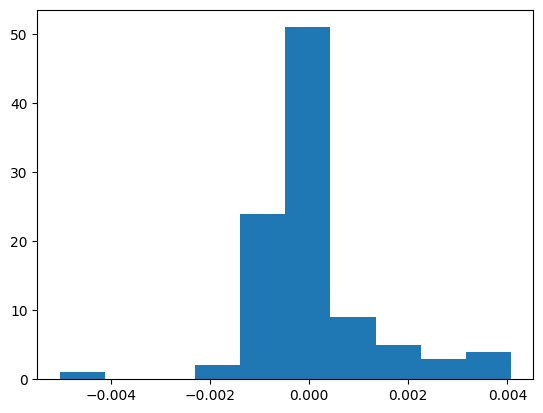

In [ ]:
print([x for x in buys if x < -0.003])
plt.hist(buys)

(array([ 2.,  0., 13., 22.,  4.,  2.,  0.,  1.,  0.,  1.]),
 array([-0.00236, -0.00166, -0.00096, -0.00026,  0.00044,  0.00114,
         0.00184,  0.00254,  0.00324,  0.00394,  0.00464]),
 <BarContainer object of 10 artists>)

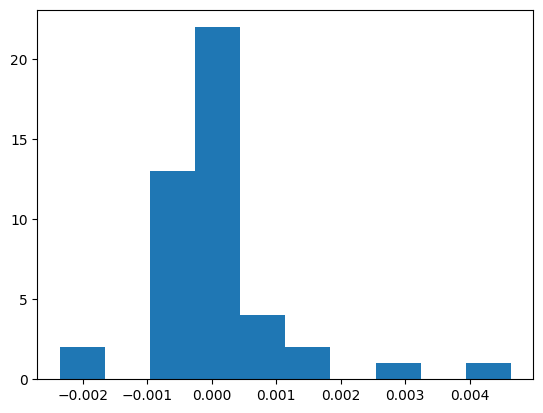

In [ ]:
plt.hist(shorts)

In [ ]:
len(buys)

99

#Future work
### I now have multiple ideas working at once. 
### I have an idea of making trades based on times
### Based on trend
### Multiple time frames
### also going long and short on two different highly correlated assets is a thought.

# The one I want to try the most is

### Working on developing this bar pattern strategy on three different time frames. Then optmizing for each. I think the probability of each would change in that case.

### Then from there I want to create a function that finds the optmizal zones/times to do this on a currency. So I can find that quickly, then run this strategy on multiple currencies really quickly

# I am actually realizing this strategy could really work well for EUR/USD on almost all time frames. Which is crazy and could really help with running this on a micro and macro scale. Also the smaller time frames will help me lead into or out of the longer time frames. I can see the real marginal gains made in this way. Especially for exiting and entering more optimal trades.




In [ ]:
# So how do I do this on multiple time frames

#10
#15
#30
#60
#2hr
#4hr

#So we could have a state for each time frame.
#Iterating through the smallest time frame.
#Then checking the other time frames, if they have a row that matches that
#Then update their state
#I actually like this
#Not sure on a few things
#Like how could I have them influence each other?
#Like That is some intreseting DS project

#I could place a lot of trades 
#I am not sure how to gain an edge there.
#I think I could have to make a new set and see if I can make any correlation with the data


#Fuck this is a lot of work to get this going percise
#Not to mention I have to translate this to the bot
#I might not have something I want working for a week or two in python.
#There are layers to do
#Though I should have a better proccess to do for other currencies soon
#And I will think of smarter ways to gain slight edges

#I am total noob at this, but I could easily see making a good side income from this
#Anyway, I move forward

#There are like 10 different DS projects here

#1. Optimizing this strat for each time frame
#2. Optimizing the correlation between them, which would be like a 6x6 or 6x6/2 - diagnal, 12 correlations
#3. Then the risk management style, this maybe the most complicated, also it has to take into account trades for different time frames effect the risk as a whole
#4. Optimizing the way of getting into and out of trades.
#5. When I am really in the green on a trade on there is a small pull back, try learning out to ride those out
#6. A. Also maybe a way of taking the other side of the trade at the picks


#I think I can do 2 and 4 in one go.
#I think I should do this very percise because I can re-use this code


In [ ]:
#SETUP
#HARDCODED
ls = allDfs[1]['timeOnly'].values.tolist()
noDuplicateLs =  list(dict.fromkeys(ls))
timeFrame15min = [(str(x)) for x in noDuplicateLs] 

In [43]:
#OPTIMIZE functions 


##I should make it so I just pass functions
##DO NOT CHANGE STATE VARIABLES IN HERE
def optimizedFunctio30min(stateDict, curr, roww,  lastCount, curCount,
                          lookBackOnTrackerGreen, countOnPastTradeOfOtherColorGreen, 
                          lookBackOnTrackerRed, countOnPastTradeOfOtherColorRed, 
                          stopLossOnGreenTrades,
                          curTime,
                          inToStartBuying = 2,
                          bottomRangeTradeTime = 15,
                          upperRangeTradeTime  = 22,):
      

      bar_candles_or_heikin_ankiki =  ('heikin_ashi_open', 'heikin_ashi_close') if stateDict['Heikin-Ashi'] else ('open', 'close')
      #This decides if it is time to trade. I exclude after 3 and before 10pm
      tradeTime =  curTime <= time(bottomRangeTradeTime) or time(upperRangeTradeTime) <= curTime
      if stateDict["lastColorBar"] == cur:         
        if curCount == inToStartBuying: 
        #Another strategy to look into is 
        #Take the long and short of every trade on a currnecy pair? 
          #extra instresting logic, to see the difference between if the past state that was for a long time
          #Was either green or red?
          #print(stateDict["tracker"][-lookBackOnTrackerGreen][1], countOnPastTradeOfOtherColorGreen , stateDict["tracker"][lookBackOnTrackerGreen][1] >= countOnPastTradeOfOtherColorGreen)
          
          stateTrackLength = len(stateDict["tracker"])
          if curr == "green" and stateTrackLength >= lookBackOnTrackerGreen and  stateDict["tracker"][-lookBackOnTrackerGreen][1] >= countOnPastTradeOfOtherColorGreen and tradeTime :
            stateDict['inTrade'] = True
            stateDict['pricePurchased']      = roww[bar_candles_or_heikin_ankiki[1]]
            #print("Purchase buy")
            stateDict['typeOfPurchase'] = "buy" if curr == "green" else "sell"
          
          if curr == "red"  and stateTrackLength >= lookBackOnTrackerRed and  stateDict["tracker"][-lookBackOnTrackerRed][1] >=  countOnPastTradeOfOtherColorRed and tradeTime :#  3,4
            stateDict['inTrade'] = True
            stateDict['pricePurchased'] =  row[bar_candles_or_heikin_ankiki[0]]
            #print("Purchase sell")
            stateDict['typeOfPurchase'] = "buy" if cur == "green" else "sell"

        #TODO THis should be checked on multiple smaller time frames.
        #As of now this is not not done
        #Which means I should take this out of this function and make a new function for this?
        #Or make a cluster fuck of logic in this function
        elif stateDict["count"] > inToStartBuying and cur == "green" and stateDict['inTrade']  and(stateDict['pricePurchased'] - row["low"]) >  stopLossOnGreenTrades:   #StopLossOnGreenTrades #0.003
          #print("NeverGetHere?")
          stateDict['inTrade'] = False
          stateDict['buys'].append(-stopLossOnGreenTrades)
          stateDict['pricePurchased'] = 0






      elif stateDict["lastColorBar"] != curr :
        stateDict["lastColorBar"] = curr#FUCK THIS SHOULD BE CHANGED HERE
        stateDict["count"]  = 0 #THIS SHOULDN'T BE CHANGE HERE EITHER
        if stateDict['inTrade']: 
          stateDict['inTrade'] = False
          if stateDict['typeOfPurchase'] == "buy":

            #So after being on a roll of 3 green candles the stop loss
            #THIS COULD BE OPTIMIZED WAAAYYYY BETTER
            if lastCount > 3:
              stopLimit = row[bar_candles_or_heikin_ankiki[1]] -  stateDict['pricePurchased']
              if stopLimit <= -stopLossOnGreenTrades:
                 stateDict['buys'].append(-stopLossOnGreenTrades)
              else: 
                 stateDict['buys'].append(stopLimit)
              stateDict['pricePurchased'] = 0
            else:
               stateDict['buys'].append(row[bar_candles_or_heikin_ankiki[1]] -  stateDict['pricePurchased'])
               stateDict['pricePurchased'] = 0

          elif stateDict['typeOfPurchase'] == "sell" :
              stateDict['shorts'].append(stateDict['pricePurchased'] - row[bar_candles_or_heikin_ankiki[1]]) 
              stateDict['pricePurchased'] = 0

      return stateDict

In [45]:
df = allDfs[0]



#Evening TODO
#Something seems really off
#I need to map out every stateVar to make sure everything is getting set properly

# I should also eventually customize it to be able to make multiple purchaces in on trade, instead of just only make a trade in the beginning
# Also figure out ways of eliminating losing trades or limiting them


#This section is for running multiple time frames at once
#Then back testing the results

#lookBackOnTrackerGreen, countOnPastTradeOfOtherColorGreen, lookBackOnTrackerRed, countOnPastTradeOfOtherColorGreen, stopLossOnGreenTrades





#stateMap = {"10min" : dict(), "15min" : dict(),"30min" : dict(),"1hr" : dict(),"2hr" : dict(), "4hr" : dict() }
for iii  in [1,2,3,4,5,6,7,8,9,10,11,12]:

  stateMap = { "15min" : (str15MinTrimeFrames , (3,iii,3, iii, 0.001)) ,
              "30min" : (str30MinTrimeFrames, (3,iii,3, iii, 0.001)),
              "60min" : (str60MinTrimeFrames, (3,iii,3, iii, 0.001)),
              "120min" : (str120MinTrimeFrames, (3,iii,3, iii, 0.001)),
              "240min" : (str240MinTrimeFrames, (3,iii,3, iii, 0.001)), }

  #algoMap  = {"15min" : (3,3,3,4, 0.003) ,"30min" : (3,3,3,4, 0.003) } #I am not sure if these should be seperate functions or just values, using the same formula


  #Create staate map for multiple time frames
  for k, v in stateMap.items():
    stateMap[k] = {'count'      : 0, 
                  'last'        : None, 
                  'lastColorBar': "green",
                  'typeOfPurchase' : None, # change this to be able to make multiple orders in one buy time
                  'tracker'     : [], 
                  'profit'      : 0, 
                  'buys'        : [] , 
                  'shorts'      : [],
                  'pricePurchased' : 0,  
                  'inTrade'     : False, 
                  'enoughData'  : False,
                  'timesToCheckForTrade' : v,
                  'times' : v[0],
                  'optimizedValues' : v[1],
                  'Heikin-Ashi' : True,
                  }







  for index, row in df.iterrows():
      for k, v in stateMap.items(): 
        # This will need to be changed in the future 
        #so that if I am trading on the 4hr, 
        #and on the 15min things are looking bad, 
        #to be able to get out of the trade
        if str(row['timeOnly']) in  v['times'] :
          #print(k, row['timeOnly'] ) #This seems to show that the above if #statement is working properly
                                     #Maybe in the future a unit test on this 
          
          bar_candles_or_heikin_ankiki =  ('heikin_ashi_open', 'heikin_ashi_close') if True else ('open', 'close') #Change this in the future
          #State Variables for the current state
          cur       = "green" if row[bar_candles_or_heikin_ankiki[1]] >= row[bar_candles_or_heikin_ankiki[0]] else "red"
          lastCount = stateMap[k]["count"]
          countCur = 0 if stateMap[k]["lastColorBar"] != cur else   (stateMap[k]['count'] + 1)


          if index > 400 :        
            lookBackOnTrackerGreen, countOnPastTradeOfOtherColorGreen, lookBackOnTrackerRed, countOnPastTradeOfOtherColorGreen, stopLossOnGreenTrades = stateMap[k]['optimizedValues']

            if str(row['timeOnly']) in  v['times'] :

              lastCount = stateMap[k]["count"]

              curCount  = stateMap[k]["count"] + 1 if stateMap[k]["lastColorBar"] == cur else 0


              #print(row['timeOnly'], str(row['timeOnly']) in  v['times'],  v['times'])
              #print(lookBackOnTrackerGreen, countOnPastTradeOfOtherColorGreen, lookBackOnTrackerRed, countOnPastTradeOfOtherColorGreen, stopLossOnGreenTrades )
              #This should not be changing state variables
              #If that is the case then I don't think we want a return fucntion here?
              tempV = optimizedFunctio30min(v, cur, row, lastCount, curCount,
                                  lookBackOnTrackerGreen, countOnPastTradeOfOtherColorGreen, 
                                  lookBackOnTrackerRed, countOnPastTradeOfOtherColorGreen, 
                                  stopLossOnGreenTrades,
                                  row['timeOnly'],
                                  inToStartBuying = 1)
              stateMap[k]= tempV


            #HOlly Shit keeping these lines inside the code totally changes the 
            #the alog
            #this is more based on the underlying chart
            #if I keep these in
            #This might be abother thing to optimize
            #I like this
            #THings to explore in the future

            #Update 
          stateMap[k]["lastColorBar"] =  cur
          stateMap[k]["tracker"].append( (stateMap[k]["lastColorBar"] ,
                                      countCur))
          stateMap[k]["count"] = curCount
      


#

# print all  
  # for k, v in stateMap.items():
  #   #print()
  #   print("Buys only")
  #   print(iii, k, 
  #         "buys", round(sum(v['buys']), 5),
  #         "# postive trade", len( [xxx for xxx in v['buys'] if xxx > 0 ]),
  #         "Ratio of postive to negative", len( [xxx for xxx in v['buys']if xxx > 0 ])/ len(v['buys'])
          
  #         )
  #   print("shorts only")
  #   print(iii, k, 
  #         "buys", round(sum(v['shorts']), 5),
  #         "# postive trade", len( [xxx for xxx in v['shorts'] if xxx > 0 ]),
  #         "Ratio of postive to negative", len( [xxx for xxx in v['shorts']if xxx > 0 ])/ len(v['shorts'])
          
  #         )


  for k, v in stateMap.items():
    #print()
    if sum(v['buys']) > 0:
    
      print(iii, k, 
            "buys", round(sum(v['buys']), 5),
            "# postive trade", len( [xxx for xxx in v['buys'] if xxx > 0 ]),
            "Ratio of postive to negative", len( [xxx for xxx in v['buys']if xxx > 0 ])/ len(v['buys'])
            
            )
    if sum(v['shorts']) > 0:
      print("shorts only")
      print(iii, k, 
            "shorts", round(sum(v['shorts']), 5),
            "# postive trade", len( [xxx for xxx in v['shorts'] if xxx > 0 ]),
            "Ratio of postive to negative", len( [xxx for xxx in v['shorts']if xxx > 0 ])/ len(v['shorts'])

            )


    # print("\tbuys", len( [xxx for xxx in v['buys']if xxx > 0 ]), len( [xxx for xxx in v['buys']if xxx < 0 ]   ), len( [xxx for xxx in v['buys']if xxx > 0 ])/ len(v['buys'])  )
    # print("shorts", k, sum(v['shorts']))
    #print("\tbuys", sum( [xxx for xxx in v['buys']if xxx > 0 ]   ))
    #plt.hist(v['buys'], label=k)
    #plt.hist(v['shorts'])
    # for kk, vv in v.items():
    #   print(kk, vv)



1 15min buys 0.27801 # postive trade 518 Ratio of postive to negative 0.46457399103139013
shorts only
1 15min shorts 0.69131 # postive trade 840 Ratio of postive to negative 0.7784986098239111
1 30min buys 0.06358 # postive trade 208 Ratio of postive to negative 0.5161290322580645
shorts only
1 30min shorts 0.26024 # postive trade 284 Ratio of postive to negative 0.6558891454965358
1 60min buys 0.0804 # postive trade 117 Ratio of postive to negative 0.52
shorts only
1 60min shorts 0.10473 # postive trade 126 Ratio of postive to negative 0.6494845360824743
1 120min buys 0.0804 # postive trade 117 Ratio of postive to negative 0.52
shorts only
1 120min shorts 0.10473 # postive trade 126 Ratio of postive to negative 0.6494845360824743
1 240min buys 0.04339 # postive trade 62 Ratio of postive to negative 0.5254237288135594
shorts only
1 240min shorts 0.05452 # postive trade 64 Ratio of postive to negative 0.5517241379310345
2 15min buys 0.15611 # postive trade 314 Ratio of postive to negati